In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from astropy.io import fits
from astropy import stats
import statistics
import sys
from matplotlib.widgets import CheckButtons, Slider, Button
from ipywidgets import interact, interactive

from ir_model import *
%matplotlib notebook
#%matplotlib inline

In [17]:
# import line lists from the ir_model folder, and set up some parameters for the model

mol_h2o = MolData("new_H2O", "new_data/data_Hitran_2020_H2O.par")
mol_h218o = MolData("new_H218O", "new_data/data_Hitran_2020_H218O.par")
mol_oh = MolData("OH", "new_data/data_Hitran_2020_OH.par")
mol_hcn = MolData("HCN", "new_data/data_Hitran_2020_HCN.par")
mol_c2h2 = MolData("C2H2", "new_data/data_Hitran_2020_C2H2.par")
mol_co2 = MolData("CO2", "new_data/data_Hitran_2020_CO2.par")
mol_co = MolData("CO", "new_data/data_Hitran_2020_CO.par")
mol_co13 = MolData("13CO", "new_data/data_Hitran_2020_13CO.par")
mol_nh3 = MolData("NH3", "new_data/data_Hitran_2020_NH3.par")
mol_ch4 = MolData("CH4", "new_data/data_Hitran_2020_CH4.par")
mol_so2 = MolData("SO2", "new_data/data_Hitran_2020_SO2.par")

lam_min = 4.5
lam_max = 5.3
cont_level = 0.
radius = .8
dist = 140.0


fwhm = 20. # FWHM of the observed lines

cc = 2.99792458e5 # speed of light in km/s
model_line_width = cc / fwhm
model_pixel_res = (np.mean([lam_min,lam_max]) / cc * fwhm)/10
intrinsic_line_width = 1.0

#model_line_width = 30000 # use this if want directly set that

print(model_line_width)
print(model_pixel_res)


14989.622899999998
3.2689281329418906e-05


In [18]:
# read an observed spectrum for comparison to models

datafile = 'V1331Cyg_ISH_M_jun22.fits'
hdul = fits.open(datafile)
data = hdul[0].data
RV = 0.0003 # stellar RV
wave = data[0]+RV
flux = data[1]
cont = stats.sigma_clipped_stats(flux)
flux = flux/cont[1]
print(flux)

[0.95979024 1.03857065 1.00907672 ...        nan        nan 1.6022878 ]


In [19]:
lam1=4.82
lam2=4.86

In [20]:
colors = {"h2o": 'blue', "h218o": 'cyan', "co": 'red',"co13": 'orange',"oh": 'grey',"hcn": 'magenta',"c2h2": 'green',
    "co2": 'brown',"ch4": 'yellow',"nh3": 'purple',"so2": 'purple'}
list_mols=['h2o','h218o','oh','hcn','c2h2','co2','co','co13','nh3','ch4']


In [21]:
def func(mol):
    #h2o_intensity = Intensity(mol_h2o)
    line_prop=eval(mol+'_intensity.get_table')
    #print(line_prop)
    #lam = np.array(eval(mol+'_spectrum.lamgrid')) 
    #flux2 = np.array(eval(mol+'_spectrum.flux_jy')) 
    #offset=-0.05
    
    #df=pd.DataFrame(lam)
    #df['flux']=flux2
    #df.rename(columns = {df.columns[0]:'lam'}, inplace = True)

    lines=[]
    cutoff=line_prop['intens'].max()/150
    #upp=[]
    #low=[]
    
    for n in range(len(line_prop)):
        if((line_prop['intens'][n]>cutoff) and
            (line_prop['lam'][n]>=lam1) and 
            (line_prop['lam'][n]<=lam2)): 
            lines.append(line_prop['lam'][n])

            a=line_prop['lev_up'][n]
            b=line_prop['lev_low'][n]
            
            if mol=='h2o':
                #append_arrays(mol,df['lam'][n],new,df['flux'][n],a,b)

                if (len(lines)%2==0):
                    plt.text(line_prop['lam'][n]-0.00035,1.05,a.replace('_','.'),color='blue')
                    plt.text(line_prop['lam'][n]-0.00035,1.02,b.replace('_','.'),color='blue')

                else:
                    plt.text(line_prop['lam'][n]-0.00035,1.11,a.replace('_','.'),color='blue')
                    plt.text(line_prop['lam'][n]-0.00035,1.08,b.replace('_','.'),color='blue')

            if mol=='co':
                #append_arrays(mol,df['lam'][n],new,df['flux'][n],a,b)

                plt.text(line_prop['lam'][n]-0.00015,-0.07,a,color='red')
                plt.text(line_prop['lam'][n]-0.00015,-0.11,b,color='red')

                #plt.text(line_prop['lam'][n]-0.00015,-0.07,a[0]+'-'+b[0],color='red')
                #plt.text(line_prop['lam'][n]-0.00015,-0.11,a[-4]+a[-2:],color='red')

            if mol=='co13':
                #append_arrays(mol,df['lam'][n],new,df['flux'][n],a,b)

                plt.text(df['lam'][n]-0.00015,-0.14,a[0]+'-'+b[0],color='orange')
                plt.text(df['lam'][n]-0.00015,-0.18,a[-4]+a[-2:],color='orange')

            if mol=='hcn':
                #append_arrays(mol,df['lam'][n],new,df['flux'][n],a,b)
                a=a.split('_')
                b=b.split('_')
                print(a,b)
                plt.text(line_prop['lam'][n]-0.00015,1.15,('.'.join(a))[:-1],color='magenta')#upper
                plt.text(line_prop['lam'][n]-0.00015,1.10,('.'.join(b[:4]))[:-2],color='magenta')#lower
                plt.text(line_prop['lam'][n]-0.00015,1.05,(''.join(b[-2:]))[2:],color='magenta')#branch

                #if (' '.join(a[-2:])==' '.join(b[-2])):
                    #plt.text(line_prop['lam'][n]-0.00015-0.29,' '.join(a[-2:]),color='magenta')#branch

            if mol=='oh':
                #append_arrays(mol,df['lam'][n],new,df['flux'][n],a,b)
                plt.text(df['lam'][n]-0.0003,0.75, a[5:8]+'-'+b[5:8], bbox=dict(facecolor='grey', alpha=0.9),fontweight='bold')

                if (a[:4]==b[:4]) and (a[-3:]==b[-3:]):
                    plt.text(df['lam'][n]-0.0003,0.7, a[:4]+a[-3:].replace('_',''), bbox=dict(facecolor='grey', alpha=0.9),fontweight='bold')

                else:
                    plt.text(df['lam'][n]-0.0003,0.7, a[:4]+a[-3:].replace('_',''), bbox=dict(facecolor='grey', alpha=0.9),fontweight='bold')
                    plt.text(df['lam'][n]-0.0003,0.65, b[:4]+b[-3:].replace('_',''), bbox=dict(facecolor='grey', alpha=0.9),fontweight='bold')

            if mol=='c2h2':
                if (a[:2]==b[:2]) and (a[-5:]==b[-5:]):
                    plt.text(df['lam'][n]-0.00038,0.85, a[3:6]+'-'+b[3:6], bbox=dict(facecolor='green', alpha=0.9),fontweight='bold')
                    plt.text(df['lam'][n]-0.00023,0.8, a[-5:].replace('_',''),bbox=dict(facecolor='green', alpha=0.9),fontweight='bold')

            if mol=='co2':
                #append_arrays(mol,df['lam'][n],new,df['flux'][n],a,b)
                a=a.split('_')
                b=b.split('_')

                if (len(lines)%2==0):
                    start=1.25
                else:
                    start=1.40

                if ('.'.join(a[:3])=='.'.join(b[:3])):
                    plt.text(df['lam'][n]-0.00038,start, '.'.join(a[:4])+'-'+b[3],color='brown')
                    start+=offset

                    if(''.join(a[-2:])==''.join(b[-2:])):
                        plt.text(df['lam'][n]-0.00023,start, ''.join(b[-2:]),color='brown')

                    else:
                        plt.text(df['lam'][n]-0.00023,start, ''.join(b[-2:]),color='brown')
                        plt.text(df['lam'][n]-0.00023,start+offset, ''.join(b[-2:]),color='brown')

                else:
                    plt.text(df['lam'][n]-0.00038,start, '.'.join(a[:4]),color='brown')
                    plt.text(df['lam'][n]-0.00038,start+offset, '.'.join(b[:4]),color='brown')
                    start+=offset+offset

                    if(''.join(a[-2:])==''.join(b[-2:])):
                        plt.text(df['lam'][n]-0.00023,start, ''.join(b[-2:]),color='brown')
                    else:
                        plt.text(df['lam'][n]-0.00023,start, ''.join(b[-2:]),color='brown')
                        plt.text(df['lam'][n]-0.00023,start+offset, ''.join(b[-2:]),color='brown')

            if mol=='ch4':
                #append_arrays(mol,df['lam'][n],new,df['flux'][n],a,b)
                a=a.split(" ")
                b=b.split(" ")

                if(''.join(a[:3])==''.join(b[:3])):
                    plt.text(df['lam'][n]-0.00025,0.95, ' '.join(a[3:]), bbox=dict(facecolor='yellow', alpha=0.9),fontweight='bold')
                    plt.text(df['lam'][n]-0.00025,0.9, ' '.join(b[3:]),bbox=dict(facecolor='yellow', alpha=0.9),fontweight='bold')

                else:
                    plt.text(df['lam'][n]-0.00025,0.95, ' '.join(a), bbox=dict(facecolor='yellow', alpha=0.9),fontweight='bold')
                    plt.text(df['lam'][n]-0.00025,0.9, ' '.join(b),bbox=dict(facecolor='yellow', alpha=0.9),fontweight='bold')

            if mol=='nh3':
                #append_arrays(mol,df['lam'][n],new,df['flux'][n],a,b)

                plt.text(df['lam'][n]-0.0006,0.55,a, bbox=dict(facecolor='purple', alpha=0.9),fontweight='bold')
                plt.text(df['lam'][n]-0.0006,0.5,b,bbox=dict(facecolor='purple', alpha=0.9),fontweight='bold')                
    return()

def find_transitions(mol):
    line_prop=eval(mol+'_intensity.get_table')
    lines=eval(mol+'_lines')
    upp=eval(mol+'_upper')
    low=eval(mol+'_lower')
    var()['df_'+mol]=pd.DataFrame()
    var()['df_'+mol]['upp']=[]
    var()['df_'+mol]['xupp']=[]
    var()['df_'+mol]['yupp']=[]
    var()['df_'+mol]['low']=[]
    var()['df_'+mol]['xlow']=[]
    var()['df_'+mol]['ylow']=[]
    
    n=0
    for n in range(len(upp)):
        if mol=='h2o':
            #append_arrays(mol,df['lam'][n],new,df['flux'][n],a,b)

            if (n%2==0):
                plt.text(lines[n]-0.00035,1.05,upp[n].replace('_','.'),color='blue')
                plt.text(lines[n]-0.00035,1.02,low[n].replace('_','.'),color='blue')

            else:
                plt.text(lines[n]-0.00035,1.11,upp[n].replace('_','.'),color='blue')
                plt.text(lines[n]-0.00035,1.08,low[n].replace('_','.'),color='blue')

        if mol=='co':
            #append_arrays(mol,df['lam'][n],new,df['flux'][n],a,b)

            plt.text(line_prop['lam'][n]-0.00015,-0.07,a,color='red')
            plt.text(line_prop['lam'][n]-0.00015,-0.11,b,color='red')

            #plt.text(line_prop['lam'][n]-0.00015,-0.07,a[0]+'-'+b[0],color='red')
            #plt.text(line_prop['lam'][n]-0.00015,-0.11,a[-4]+a[-2:],color='red')

        if mol=='co13':
            #append_arrays(mol,df['lam'][n],new,df['flux'][n],a,b)

            plt.text(df['lam'][n]-0.00015,-0.14,a[0]+'-'+b[0],color='orange')
            plt.text(df['lam'][n]-0.00015,-0.18,a[-4]+a[-2:],color='orange')

        if mol=='hcn':
            #append_arrays(mol,df['lam'][n],new,df['flux'][n],a,b)
            a=a.split('_')
            b=b.split('_')
            print(a,b)
            plt.text(line_prop['lam'][n]-0.00015,1.15,('.'.join(a))[:-1],color='magenta')#upper
            plt.text(line_prop['lam'][n]-0.00015,1.10,('.'.join(b[:4]))[:-2],color='magenta')#lower
            plt.text(line_prop['lam'][n]-0.00015,1.05,(''.join(b[-2:]))[2:],color='magenta')#branch

            #if (' '.join(a[-2:])==' '.join(b[-2])):
                #plt.text(line_prop['lam'][n]-0.00015-0.29,' '.join(a[-2:]),color='magenta')#branch

        if mol=='oh':
            #append_arrays(mol,df['lam'][n],new,df['flux'][n],a,b)
            plt.text(df['lam'][n]-0.0003,0.75, a[5:8]+'-'+b[5:8], bbox=dict(facecolor='grey', alpha=0.9),fontweight='bold')

            if (a[:4]==b[:4]) and (a[-3:]==b[-3:]):
                plt.text(df['lam'][n]-0.0003,0.7, a[:4]+a[-3:].replace('_',''), bbox=dict(facecolor='grey', alpha=0.9),fontweight='bold')

            else:
                plt.text(df['lam'][n]-0.0003,0.7, a[:4]+a[-3:].replace('_',''), bbox=dict(facecolor='grey', alpha=0.9),fontweight='bold')
                plt.text(df['lam'][n]-0.0003,0.65, b[:4]+b[-3:].replace('_',''), bbox=dict(facecolor='grey', alpha=0.9),fontweight='bold')

        if mol=='c2h2':
            if (a[:2]==b[:2]) and (a[-5:]==b[-5:]):
                plt.text(df['lam'][n]-0.00038,0.85, a[3:6]+'-'+b[3:6], bbox=dict(facecolor='green', alpha=0.9),fontweight='bold')
                plt.text(df['lam'][n]-0.00023,0.8, a[-5:].replace('_',''),bbox=dict(facecolor='green', alpha=0.9),fontweight='bold')

        if mol=='co2':
            #append_arrays(mol,df['lam'][n],new,df['flux'][n],a,b)
            a=a.split('_')
            b=b.split('_')

            if (len(lines)%2==0):
                start=1.25
            else:
                start=1.40

            if ('.'.join(a[:3])=='.'.join(b[:3])):
                plt.text(df['lam'][n]-0.00038,start, '.'.join(a[:4])+'-'+b[3],color='brown')
                start+=offset

                if(''.join(a[-2:])==''.join(b[-2:])):
                    plt.text(df['lam'][n]-0.00023,start, ''.join(b[-2:]),color='brown')

                else:
                    plt.text(df['lam'][n]-0.00023,start, ''.join(b[-2:]),color='brown')
                    plt.text(df['lam'][n]-0.00023,start+offset, ''.join(b[-2:]),color='brown')

            else:
                plt.text(df['lam'][n]-0.00038,start, '.'.join(a[:4]),color='brown')
                plt.text(df['lam'][n]-0.00038,start+offset, '.'.join(b[:4]),color='brown')
                start+=offset+offset

                if(''.join(a[-2:])==''.join(b[-2:])):
                    plt.text(df['lam'][n]-0.00023,start, ''.join(b[-2:]),color='brown')
                else:
                    plt.text(df['lam'][n]-0.00023,start, ''.join(b[-2:]),color='brown')
                    plt.text(df['lam'][n]-0.00023,start+offset, ''.join(b[-2:]),color='brown')

        if mol=='ch4':
            #append_arrays(mol,df['lam'][n],new,df['flux'][n],a,b)
            a=a.split(" ")
            b=b.split(" ")

            if(''.join(a[:3])==''.join(b[:3])):
                plt.text(df['lam'][n]-0.00025,0.95, ' '.join(a[3:]), bbox=dict(facecolor='yellow', alpha=0.9),fontweight='bold')
                plt.text(df['lam'][n]-0.00025,0.9, ' '.join(b[3:]),bbox=dict(facecolor='yellow', alpha=0.9),fontweight='bold')

            else:
                plt.text(df['lam'][n]-0.00025,0.95, ' '.join(a), bbox=dict(facecolor='yellow', alpha=0.9),fontweight='bold')
                plt.text(df['lam'][n]-0.00025,0.9, ' '.join(b),bbox=dict(facecolor='yellow', alpha=0.9),fontweight='bold')

        if mol=='nh3':
            #append_arrays(mol,df['lam'][n],new,df['flux'][n],a,b)

            plt.text(df['lam'][n]-0.0006,0.55,a, bbox=dict(facecolor='purple', alpha=0.9),fontweight='bold')
            plt.text(df['lam'][n]-0.0006,0.5,b,bbox=dict(facecolor='purple', alpha=0.9),fontweight='bold')                
    return()

In [22]:
# set up molecular models; you can set a specific temperature (t_kin) and column density (n_mol) for each one
# make the model spectra to be plotted below

t_kin_dict={"h2o": 2000, "h218o": 700, "co": 2000,"co13": 1000,"oh": 2000,"hcn": 1500,"c2h2": 1500,
    "co2": 1500,"ch4": 1500,"nh3": 1500,"so2": 2000}
n_mol_dict={"h2o": 1e20, "h218o": 1e18, "co": 1e17,"co13": 1e16,"oh": 1e20,"hcn": 1e19,"c2h2": 1e20,
    "co2": 1e17,"ch4": 1e20,"nh3": 1e19,"so2": 1e20}
radius={"h2o": 0.08, "h218o": 0.5, "co": 0.2,"co13": 0.6,"oh": 0.5,"hcn": 0.5,"c2h2": 0.3,
    "co2": 0.3,"ch4": 2.0,"nh3": 0.3,"so2": 0.8}

for mol in list_mols:
    vars()[mol+'_intensity'] = Intensity(eval('mol_'+mol))
    eval(mol+'_intensity').calc_intensity(t_kin=t_kin_dict[mol], n_mol=n_mol_dict[mol], dv=intrinsic_line_width)
    
    #vars()[mol+'_spectrum'] = Spectrum(lam_min=lam_min, lam_max=lam_max, dlambda=model_pixel_res, R=model_line_width, distance=dist) 
    #eval(mol+'_spectrum').add_intensity(eval(mol+'_intensity'), radius[mol] ** 2 * np.pi)

C:\Users\bhb42\Desktop\Banzatti\ir_model\intensity.py:142: RuntimeWarning: invalid value encountered in true_divide
  * (x_low * m.lines.g_up / m.lines.g_low - x_up)


In [23]:
mol_array=[]
lam_array=[]
closest_array=[]
flux_array=[]
lev_up_array=[]
lev_low_array=[]

def append_arrays(mol,lam,closest,flux,lev_up,lev_low):
    mol_array.append(mol)
    lam_array.append(lam)
    closest_array.append(closest)
    flux_array.append(flux)
    lev_up_array.append(lev_up)
    lev_low_array.append(lev_low)
    
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
    
co_cut=10
co13_cut=100
h2o_cut=5
h218o_cut=10
oh_cut=450
hcn_cut=150
c2h2_cut=500
co2_cut=3100
ch4_cut=1000
nh3_cut=300
so2_cut=10

def find_lines(mol,cut):
    #h2o_intensity = Intensity(mol_h2o)
    line_prop=eval(mol+'_intensity.get_table')
    #lam = np.array(eval(mol+'_spectrum.lamgrid')) 
    #flux2 = np.array(eval(mol+'_spectrum.flux_jy')) 
    #offset=-0.05
    
    #df=pd.DataFrame(lam)
    #df['flux']=flux2
    #df.rename(columns = {df.columns[0]:'lam'}, inplace = True)

    lines=[]
    cutoff=line_prop['intens'].max()/cut
    upp=[]
    low=[]
    
    for n in range(len(line_prop)):
        if((line_prop['intens'][n]>cutoff) and
            (line_prop['lam'][n]>=lam1) and 
            (line_prop['lam'][n]<=lam2)): 
            lines.append(line_prop['lam'][n])

            upp.append(line_prop['lev_up'][n])
            low.append(line_prop['lev_low'][n])
            
    return(lines,upp,low)

for mol in list_mols:
    vars()[mol+'_lines'],vars()[mol+'_upper'],vars()[mol+'_lower']=find_lines(mol, eval(mol+'_cut'))
   

<IPython.core.display.Javascript object>


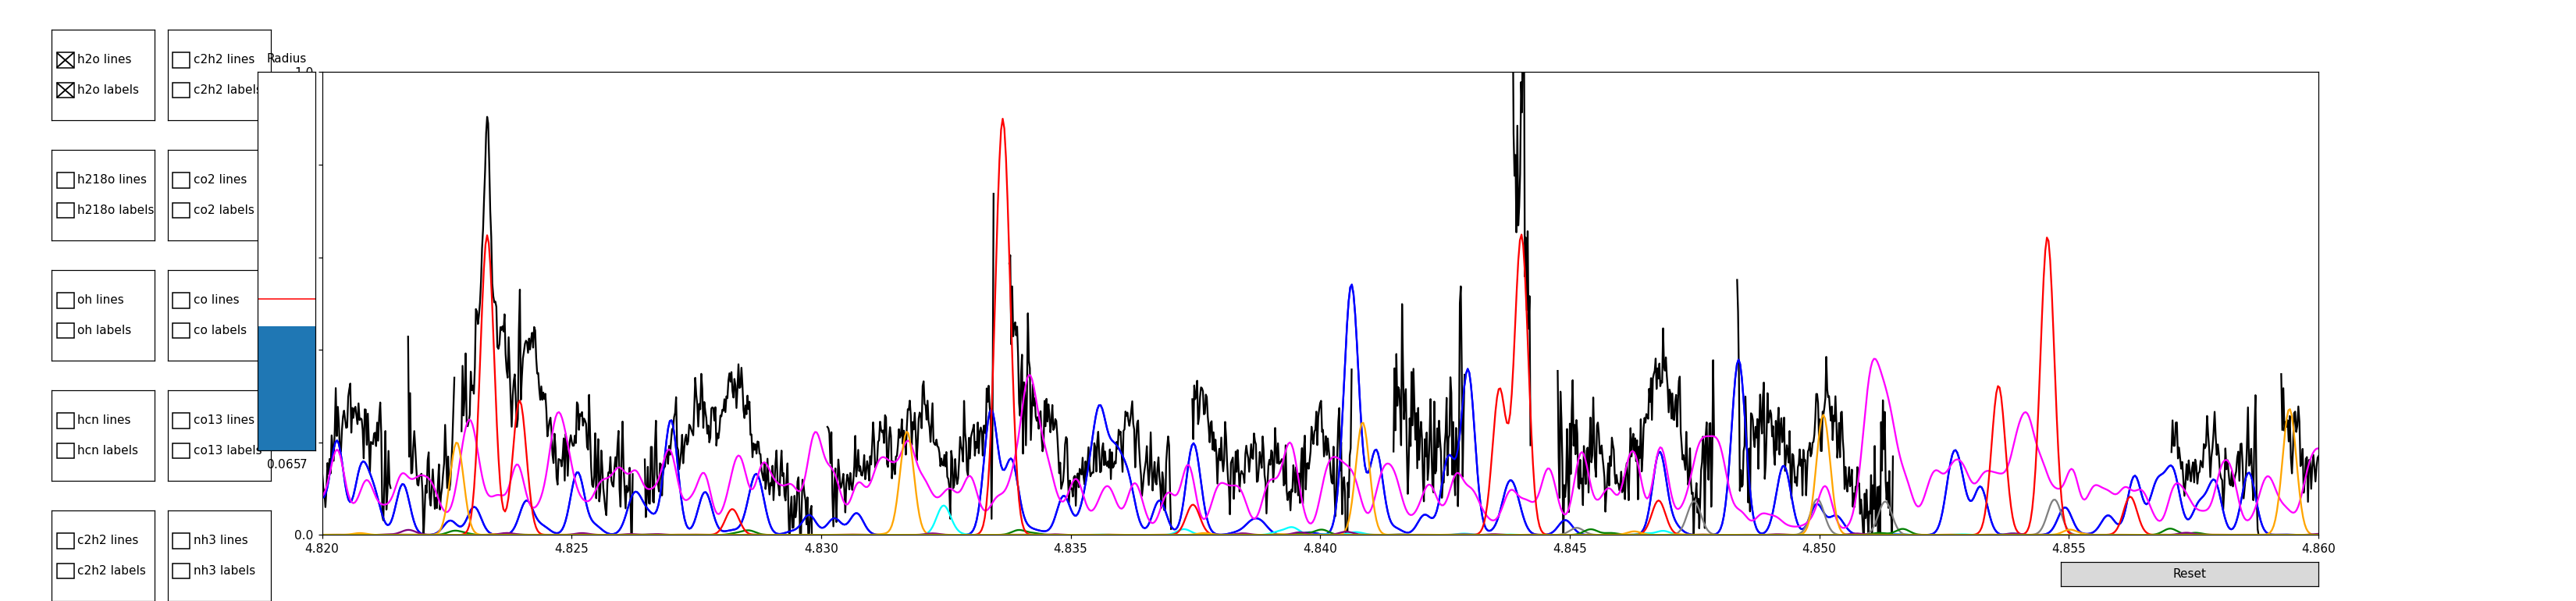

In [26]:
# plot the model spectra and data
plt.ion()
fig, ax=plt.subplots(figsize=(30, 7))
plt.xlabel("wavelength (micron)")
plt.ylabel("flux (Jy)");
plt.xlim([lam1, lam2])
plt.ylim([0, 4])
plt.xticks(np.arange(lam1,lam2, 0.005))

floor=0.8

# plot models
for mol in list_mols:
    vars()['model_'+mol]=plt.plot(eval(mol+'_spectrum').lamgrid, eval(mol+'_spectrum').flux_jy, color=colors[mol], label=mol)   

# plot data and format plot
plt.plot(wave, flux-floor, color='black')
plt.ylim([0, 1])
plt.minorticks_on() 
plt.tick_params(which='minor',length=3,axis='both', direction='out', width=0.5)
plt.rcParams['figure.figsize'] = [5, 10]
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

# make vertical lines and labels
for mol in list_mols:
    vars()[mol+'_vlines']=ax.vlines(eval(mol+'_lines'), 0., 4., linestyles='dashed', visible= False,color=colors[str(mol)])
    
    for n in range(0,len(eval(mol+'_lines'))):
        if (n%2==0):
            vars()[mol+'_label'+str(n)+'_upp']=plt.text(eval(mol+'_lines[n]')-0.00035,1.05,eval(mol+'_upper[n]').replace('_','.'),color=colors[str(mol)],visible=False)
            vars()[mol+'_label'+str(n)+'_low']=plt.text(eval(mol+'_lines[n]')-0.00035,1.02,eval(mol+'_lower[n]').replace('_','.'),color=colors[str(mol)],visible=False)
        else:
            vars()[mol+'_label'+str(n)+'_upp']=plt.text(eval(mol+'_lines[n]')-0.00035,1.11,eval(mol+'_upper[n]').replace('_','.'),color=colors[str(mol)],visible=False)
            vars()[mol+'_label'+str(n)+'_low']=plt.text(eval(mol+'_lines[n]')-0.00035,1.08,eval(mol+'_lower[n]').replace('_','.'),color=colors[str(mol)],visible=False)

# function to toggle visibility of lines/labels when checkbox is clicked
def toggle(label):
    label=label.split(' ')
    #mol=label[0]
    if (label[1])=='labels':
        for n in range(0,len(eval(label[0]+'_lines'))):
            eval(label[0]+'_label'+str(n)+'_upp').set_visible(not eval(label[0]+'_label'+str(n)+'_upp').get_visible())
            eval(label[0]+'_label'+str(n)+'_low').set_visible(not eval(label[0]+'_label'+str(n)+'_low').get_visible())
    
    else:
        eval(label[0]+'_vlines').set_visible(not  eval(label[0]+'_vlines').get_visible())

#creates checkboxes for first 5 molecules
height=0.8
for mol in list_mols[:5]:
    rax = plt.axes([0.02, height, 0.04, 0.15])
    labels = [mol+' lines',mol+' labels']
    visibility=[False,False]
    vars()['check_'+mol] = CheckButtons(rax, labels, visibility)
    height-=0.2

#creates checkboxes for last 5 molecules
height=0.8
for mol in list_mols[4:]:
    rax = plt.axes([0.065, height, 0.04, 0.15])
    labels = [mol+' lines',mol+' labels']
    visibility=[False,False]
    vars()['check_'+mol] = CheckButtons(rax, labels, visibility)
    height-=0.2
    
# when checkbox is clicked, calls 'toggle'
for mol in list_mols:
    eval('check_'+mol).on_clicked(toggle)
    
# Make a vertically oriented slider to control the amplitude
axamp = plt.axes([0.1, 0.25, 0.0225, 0.63])
radius_slider = Slider(
    axamp,
    label="Radius",
    valmin=0,
    valmax=0.2,
    valinit=radius['h2o'],
    orientation="vertical")

def update(val):
    h2o_spectrum = Spectrum(lam_min=lam_min, lam_max=lam_max, dlambda=model_pixel_res, R=model_line_width, distance=dist)
    h2o_spectrum.add_intensity(h2o_intensity, radius_slider.val ** 2 * np.pi)
    #model_h2o.set_ydata(h2o_spectrum.flux_jy)
    ax.clear()
    plt.xlim([lam1, lam2])
    plt.ylim([0, 1])
    #fig.canvas.draw()
    fig.canvas.flush_events()
    model_h2o=plt.plot(h2o_spectrum.lamgrid, h2o_spectrum.flux_jy, color=colors['h2o'], label='h2o')  
    plt.plot(wave, flux-floor, color='black')
    for mol in list_mols:
        vars()['model_'+mol]=plt.plot(eval(mol+'_spectrum').lamgrid, eval(mol+'_spectrum').flux_jy, color=colors[mol], label=mol)   

    
    #model_h2o.remove()
    #fig.canvas.draw_idle()
    #plt.axes.clear()
    #plt.axes.set_xlim(0,1)
    #plt.axes.set_ylim(lam1,lam2)
    
    #plt.canvas.draw()
    
radius_slider.on_changed(update)
    
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

ax=plt.axes(ax)
#model_h2o.remove()

def reset(event):
    radius_slider.reset()
button.on_clicked(reset)
#plt.ion()
plt.show()
print(model_h2o)

In [57]:
colors = {
  "h2o": 'blue',
  "hcn": 'magenta',
}
print(colors['h2o'])
print(model_h2o)

blue


In [ ]:
mol='c2h2'
line_prop=eval(mol+'_intensity.get_table')
cutoff=line_prop['intens'].max()/10
print(line_prop[line_prop['intens']>cutoff])

In [ ]:
c2h2=500
co2=3100
nh3=300
co13=100
oh=450
print(find_lines('h2o',5)[0])